# Análise do risco de inadimplência dos mutuários

Seu projeto é preparar um relatório para a divisão de empréstimos de um banco. Você precisará descobrir se o estado civil de um cliente e o número de filhos têm impacto sobre se ele deixará de pagar um empréstimo. O banco já tem alguns dados sobre a capacidade de crédito dos clientes.

Seu relatório será considerado ao criar uma **pontuação de crédito** de um cliente em potencial. A **contagem de crédito** é usada para avaliar a capacidade de um devedor em potencial de pagar seu empréstimo.

# Introdução ao projeto
Neste projeto iremos abordar risco de inadimplência de uma base de dados. O projeto é preparar um relatório para a divisão de empréstimos de um banco. Vamos realizar uma série de analises para descobrir as seguintes relações:

* Existe alguma relação entre ter filhos e pagar um empréstimo em dia?
* Existe alguma relação entre o estado civil e o pagamento de um empréstimo no prazo estipulado?
* Existe uma relação entre o nível de renda e o pagamento de um empréstimo no prazo?
* Como as diferentes finalidades do empréstimo afetam o pagamento pontual do empréstimo?


Para tal, iremos passar pelas fases de:

* Pré-processamento de dados;
* Limpeza de dados e processamento;
* Categorização de dados ou Clusterização;
* Análise de premissas e descoberta de relações.

Iremos utilizar da base de dados fornecida pelo banco para a análise geral. Teremos que ter muito cuidado com dados ausentes, duplicados ou duplicatas implícitas durante o decorrer do projeto.

## Abra o arquivo de dados e veja as informações gerais.

Importar pandas.
Vamos utiizar a função shapiro para cálculo de distribuição de dados.

Ler o arquivo e salvar na variável df.

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
from scipy.stats import shapiro 

# Carregando dados no computador pessoal
try:
    df = pd.read_csv(r'/Users/gabrielreus/Downloads/credit_scoring_eng.csv')
    
# Carregando dados no JupyterHub
except:
    df = pd.read_csv(r'/datasets/credit_scoring_eng.csv')

## Tarefa 1. Exploração de dados

**Descrição dos dados**
- `children` - o número de crianças na família
- `days_employed` - experiência de trabalho em dias
- `dob_years` - idade do cliente em anos
- `education` - educação do cliente
- `education_id` - identificador de educação
- `family_status` - estado civil do cliente
- `family_status_id` - identificador de estado civil
- `gender` - gênero do cliente
- `income_type` - tipo de emprego
- `debt` - havia alguma dívida no pagamento do empréstimo
- `total_income` - renda mensal
- `purpose` - o objetivo de obter um empréstimo

Vamos usar a função info() para ter uma visão macro do DataFrame - descobrir as colunas, os tipos e valores nulos.

Vamos usar a função head() para uma visão do conjunto de dados, organização e como estão dispostos - descobrir modelo, possíveis erros e organização

In [2]:
# Vamos ver quantas linhas e colunas nosso conjunto de dados tem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
# vamos exibir as primeiras 10 primeiras linhas
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family



É possível observar que temos o total de 21525 linhas de entrada. As colunas que contem nulos são:

* days_employed
* total_income

A tabela contém doze colunas. Elas armazenam tipo de dado: int, float e object

De acordo com a documentação:

* 'children' — número de filhos
* 'days_employed' — dias que está empregado
* 'dob_years' — idade
* 'education' — grau de educação
* 'education_id' — identificador da educação do cliente
* 'family_status' — estado civil do cliente
* 'family_status_id ' — identificador do estado civil do cliente
* 'gender' — o sexo do cliente
* 'income_type' — o tipo de renda do cliente
* 'debt' — se o cliente já deixou de pagar um empréstimo
* 'total_income' — renda mensal
* 'purpose' — motivo para fazer um empréstimo

Não há problemas com o estilo nos nomes das colunas.

Algumas colunas (exemplo: 'education)' estão com letra maiúscula, alguns com letra minúscula.
A quantidade de valores de linhas das colunas é diferente. Isso significa que os dados contém valores ausentes.

Há valores negativos em 'days_employed' porém na coluna 'income_type' diz que o cliente está empregado.

Coluna 'purpose' não está padronizada, exemplo: 

* purchase of the house
* purchase of the house for my family

In [4]:
# Obter informações sobre dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Como avaliado anteriormente existem valores nulos em 2 colunas - days_employed & total_income

In [5]:
# Vejamos a tabela filtrada com valores ausentes na primeira coluna com dados ausentes
df_filtered = df.copy()
df_filtered = df_filtered[df_filtered['days_employed'].isna()]
print('Primeiros Valores Filtrados:')
df_filtered.head(10)

Primeiros Valores Filtrados:


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
65,0,NaN,21,secondary education,1,unmarried,4,M,business,0,NaN,transactions with commercial real estate
67,0,NaN,52,bachelor's degree,0,married,0,F,retiree,0,NaN,purchase of the house for my family
72,1,NaN,32,bachelor's degree,0,married,0,M,civil servant,0,NaN,transactions with commercial real estate
82,2,NaN,50,bachelor's degree,0,married,0,F,employee,0,NaN,housing
83,0,NaN,52,secondary education,1,married,0,M,employee,0,NaN,housing


In [6]:
# Últimos valores da tabela filtrada
print('Últimos valores filtrados: ')
df_filtered.tail(10)

Últimos valores filtrados: 


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21415,0,NaN,54,secondary education,1,married,0,F,retiree,0,NaN,housing transactions
21423,0,NaN,63,secondary education,1,married,0,M,retiree,0,NaN,purchase of a car
21426,0,NaN,49,secondary education,1,married,0,F,employee,1,NaN,property
21432,1,NaN,38,some college,2,unmarried,4,F,employee,0,NaN,housing transactions
21463,1,NaN,35,bachelor's degree,0,civil partnership,1,M,employee,0,NaN,having a wedding
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate
21510,2,NaN,28,secondary education,1,married,0,F,employee,0,NaN,car purchase



Aparentemente os valores ausentes tem simetria pois:

 a) Pela chamada de df.info() pode-se observar que tem o mesmo número de valores ausentes nas colunas.

 b) Pela coluna filtrada chamando head() e tail() pode-se observar que seguem um padrão de ausência nas colunas em que valores são ausentes em 'days_employed' e 'total_income'

In [7]:
# Coletando dados gerais da tabela filtrada
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


In [8]:
# Filtrando a base com várias condições
df_filtered1 = df_filtered[df_filtered['days_employed'].isnull()]
df_filtered2 = df_filtered[df_filtered['total_income'].isnull()]
df_filtered3 = df_filtered[df_filtered['days_employed'].isnull() & df_filtered['total_income'].isnull()]


print(f'Linhas em tabela com filtro em Days_employed: {len(df_filtered1)}')
print(f'Linhas em tabela com filtro em Total Income: {len(df_filtered2)}')
print(f'Linhas em tabela com duplo filtro: {len(df_filtered3)}')

Linhas em tabela com filtro em Days_employed: 2174
Linhas em tabela com filtro em Total Income: 2174
Linhas em tabela com duplo filtro: 2174


**Conclusão intermediária**


O valor de linhas filtradas corresponde ao valor total de valores ausentes, isso pode ser visto na comparação das características em .info() e na DataFrame filtrada. Os valores nulos tem o padrão de serem nulos sempre na mesma linha.

Levando em consideração que o total de linhas do DataFrame original é de 21525 e tem-se 2174 linhas com dados faltantes temos que 10,1% das linhas da DataFrame tem dados faltando. Este valor é consideravelmente alto. 

Considerando que a coluna 'days_employed' significa o tempo de trabalho do cliente podemos tirar a premissa/relação lógica que quanto maior a idade do cliente (coluna: 'dob_years') maior o tempo que o cliente trabalhou.

A coluna 'total_income' pode-se tirar a premissa/relação o nível educacional (coluna: 'education') e, também, o gênero (coluna: 'gender') visto que sabe-se que há uma discrepância entre os salários (homem vs mulher) e que quanto maior o nível de especialização maior tende ser sua remuneração. Além disso, também é importante levar em consideração a categoria de idade.

Por meio das análises anteriores podemos perceber que há uma correlação clara entre dob_years e total_income. Os dados a primeiro ponto parecem ser ausentes nas mesmas linhas, assim iremos concluir de fato que isso é verídico e calcular a distribuição da DataFrame.

Iremos analisar a distribuição da DataFrame e analisar se os valores ausentes seguem o padrão nas colunas total_income e dob_years.

In [9]:
# Comprovando que os valores são ausentes sempre nas duas colunas por days_employed

# Vejamos a tabela filtrada com valores ausentes na primeira coluna com dados ausentes
filtrodf = df.copy()
filtrodf = filtrodf[filtrodf['days_employed'].isna()]

# Comprovando se são nulos sempre na mesmas colunas
filtrodf['total_income'].unique()

# Comprovando o filtro
print(filtrodf)

       children  days_employed  dob_years            education  education_id  \
12            0            NaN         65  secondary education             1   
26            0            NaN         41  secondary education             1   
29            0            NaN         63  secondary education             1   
41            0            NaN         50  secondary education             1   
55            0            NaN         54  secondary education             1   
...         ...            ...        ...                  ...           ...   
21489         2            NaN         47  Secondary Education             1   
21495         1            NaN         50  secondary education             1   
21497         0            NaN         48    BACHELOR'S DEGREE             0   
21502         1            NaN         42  secondary education             1   
21510         2            NaN         28  secondary education             1   

           family_status  family_status

In [10]:
# Comprovando que os valores são ausentes sempre nas duas colunas por total_income

# Vejamos a tabela filtrada com valores ausentes na primeira coluna com dados ausentes
filtro_df = df[df['total_income'].isna()]

# Comprovando se são nulos sempre na mesmas colunas
filtro_df['days_employed'].unique()

# Comprovando o filtro
print(filtro_df)

       children  days_employed  dob_years            education  education_id  \
12            0            NaN         65  secondary education             1   
26            0            NaN         41  secondary education             1   
29            0            NaN         63  secondary education             1   
41            0            NaN         50  secondary education             1   
55            0            NaN         54  secondary education             1   
...         ...            ...        ...                  ...           ...   
21489         2            NaN         47  Secondary Education             1   
21495         1            NaN         50  secondary education             1   
21497         0            NaN         48    BACHELOR'S DEGREE             0   
21502         1            NaN         42  secondary education             1   
21510         2            NaN         28  secondary education             1   

           family_status  family_status


Como descobertas temos:
* Como suspeitamos os valores ausentes tem uma correlação e seguem um padrão entre as colunas days_employed e total_income.
* Este padrão segue por toda nossa DataFrame, ou seja, se há um valor nulo em quaisquer uma das colunas ela será nulo na outra coluna.
* Nenhuma outra coluna tem valor ausente.

**Possíveis motivos para valores ausentes nos dados**

Ao analisar os dados sabemos que o tipo de dado é tipo NaN, normalmente isso ocorre quando o dado não foi dado input ou preenchido pelo operador.

Podemos pressupor que a pessoa não tenha dado entrada nos valores de dias de trabalho e renda ou que a pessoa possa não estar trabalhando e por isso não tenha renda.

Sabemos que os valores ausentes não são aleatórios.

Vamos gerar agora histogramas para analisar os conjuntos de dados.

array([[<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'days_employed'}>,
        <AxesSubplot:title={'center':'dob_years'}>],
       [<AxesSubplot:title={'center':'education_id'}>,
        <AxesSubplot:title={'center':'family_status_id'}>,
        <AxesSubplot:title={'center':'debt'}>],
       [<AxesSubplot:title={'center':'total_income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

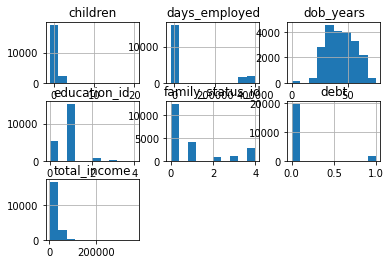

In [11]:
# Verificar a distribuição em todo o conjunto de dados
df.hist()

array([[<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'days_employed'}>,
        <AxesSubplot:title={'center':'dob_years'}>],
       [<AxesSubplot:title={'center':'education_id'}>,
        <AxesSubplot:title={'center':'family_status_id'}>,
        <AxesSubplot:title={'center':'debt'}>],
       [<AxesSubplot:title={'center':'total_income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

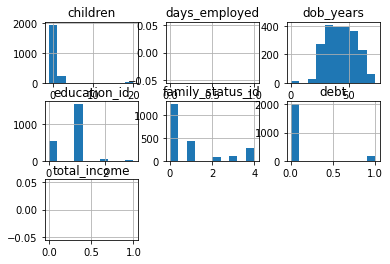

In [12]:
# Verificar a distribuição na tabela filtrada
# Vejamos a tabela filtrada com valores ausentes na primeira coluna com dados ausentes
filtrodf.hist()

**Conclusão intermediária**

Observando a distribuição das duas DataFrames temos dados muito semelhantes em todos os parâmetros para todas as colunas, mesmo com número de linhas de dados diferentes. Isso significa que os dados centrais são muito parecidos, podeos observar tal semelhança pelos histogramas gerados. A semelhança pode ser observada nas propriedades estatísticas dos dados, como média, desvio padrão, assimetria e curtose, mas os valores individuais dos dados filtrados ainda podem ser diferentes dos valores originais.

Por meio dos histogramas gerados podemos ver que a distribuição de total_income e days_employed é do tipo não normal,m mas posteriormente realizaremos esta análise para decidir se iremos ou não substituir os valore ausentes e se irá ser pela média ou mediana.

De início poderíamos, já que as DataFrames filtradas e original, tem distribuição parecida afirmar que seria possível a substituição de valores ausentes.


**Conclusões**

Sim encontramos o padrão de que os valores ausentes estão sempre nas mesmas colunas - 'total_income' e 'days_employed' isto segue por todos nossos dados. Chegamos a essa conclusão a partir da filtragem da base de dados e separando somente as linhas que possuam, ao menos, 1 valor ausente. Fizemos a checagem disso por meio de filtragem específica das colunas e contando valores únicos entre elas.

Para abordar os valores ausentes realizamos uma série de testes, desde correlação entre colunas, descrição e distribuição dos valores (média, desv.pad e quartis) até histograma das colunas com valores ausentes.

Por meio destas análises poderemos perceber, principalmente, pelohistograma das dataframes que os valores apresentam distribuição não normal dos dados em ambos os casos e como método de confirmação utilizaremos o teste estatístico de Shapiro-Wilke para confirmar que nossa distribuição de dados é não normal.

Assim vamos seguir para a parte de transformação de dados em que:

* Primeiramente vamos transformar os valores de 'days_employed' para inteiros e valores positivos. Não existem dias negativos.

* Iremos padronizar os dados em 'education' para lowercase e padronizar os dados.

* Iremos verificar os padrões de escrita nos casos de 'family_status' e 'purpose' padronizando os dados - observamos que temos duplicadas implicitas.

* Iremos trabalhar com a coluna children, gender, dob_years, etc para encontrar erros e limpar.

* Para os valores ausentes, realizamos uma série de testes para sabermos que temos para tais colunas uma distribuição não normal ou normal, decidindo se iremos trabalhar com média ou mediana dos valores. Para tal podemos para ter maior precisão clusterizar nossos dados via categorização em grupos.

## Transformação de dados

Nesta seção vamos aplicar as correções citadas anteriormente que foram previstas.

Vamos começar removendo duplicatas e corrigindo as informações conforme necessário.

In [13]:
# Vamos ver todos os valores na coluna de educação para verificar se e quais grafias precisarão ser corrigidas
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

Podemos observar que não há nenhum dado mal escrito, porém estão em UpperCase, LowerCase e misturados. Iremos então aplicar uma função para converter tudo para LowerCase

In [14]:
# Corrija os registros, se necessário
df['education'] =  df['education'].str.lower()

In [15]:
# Verificando todos os valores na coluna para ter certeza de que os corrigimos
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

Além disso, para facilitar temos duplicatas implícitas, para facilitar nossos calculos iremos reunir 'some college', 'graduate degree' e 'bachelor's degree'. Em essência todos eles são ensino superior.

In [16]:
df['education'] =  df['education'].replace("bachelor's degree",'some college')
df['education'] =  df['education'].replace('graduate degree','some college')

Vamos verificar a coluna children

In [17]:
# Vamos ver a distribuição de valores na coluna `children`
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [18]:
df[df['children'] == 20]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,-880.221113,21,secondary education,1,married,0,M,business,0,23253.578,purchase of the house
720,20,-855.595512,44,secondary education,1,married,0,F,business,0,18079.798,buy real estate
1074,20,-3310.411598,56,secondary education,1,married,0,F,employee,1,36722.966,getting an education
2510,20,-2714.161249,59,some college,0,widow / widower,2,F,employee,0,42315.974,transactions with commercial real estate
2941,20,-2161.591519,0,secondary education,1,married,0,F,employee,0,31958.391,to buy a car
...,...,...,...,...,...,...,...,...,...,...,...,...
21008,20,-1240.257910,40,secondary education,1,married,0,F,employee,1,21363.842,to own a car
21325,20,-601.174883,37,secondary education,1,married,0,F,business,0,16477.771,profile education
21390,20,NaN,53,secondary education,1,married,0,M,business,0,NaN,buy residential real estate
21404,20,-494.788448,52,secondary education,1,married,0,M,business,0,25060.749,transactions with my real estate


Temos dados problemáticos na coluna 'children' em que existem dados com clientes que possuem 20 filhos, algo incomum, e clientes com -1 filhos nesse caso impossível. Filtrando os dados com clientes com 20 filhos vemos que realmente está errado, pois há clientes com 27 anos e com 20 filhos.

Estes dados em conjunto representam, aproximadamente, 0.6% da amostra total. 
Poderíamos pensar que o número de filhos foi digitado incorreto e que o valor deveria ser 1 filho e 2 filhos, mas não temos como comprovar isso, devido a isso e a baixa representatividade dos dados na amostra iremos optar por deletar tais linhas.

In [19]:
# [corrija os dados com base na sua decisão]
df = df.drop(df[df['children'] == 20].index)
df = df.drop(df[df['children'] < 0].index)

In [20]:
# Verificar a coluna `children` novamente para ter certeza de que está tudo corrigido
df['children'].value_counts()

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

In [21]:
# Verificar nossa DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21402 non-null  int64  
 1   days_employed     19240 non-null  float64
 2   dob_years         21402 non-null  int64  
 3   education         21402 non-null  object 
 4   education_id      21402 non-null  int64  
 5   family_status     21402 non-null  object 
 6   family_status_id  21402 non-null  int64  
 7   gender            21402 non-null  object 
 8   income_type       21402 non-null  object 
 9   debt              21402 non-null  int64  
 10  total_income      19240 non-null  float64
 11  purpose           21402 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


Agora iremos trabalhar com os dados em 'days_employed', verificando por existência de erros. 

Anteriormente já sabíamos que haviam valores negativos, o que não existe dias negativos. Além disso, necessitamos converter de float() para int(), pois só existem dias inteiros.

Também sabemos que existem valores que estão faltando. Iremos trabalhar posteriormente com os valores ausentes e, também, transformar para números inteiros posteriormente.

No momento, iremos somente transformar os dias negativos para positivos.

In [22]:
# Encontre dados problemáticos em `days_employed`, se existirem, e calcule a porcentagem

# Contagem de dias negativos
contagem = sum(df['days_employed'] < 0)

# Total de linhas
total = len(df['days_employed'])

# Cálculo do percentual
percentage = f"{contagem/total:.2%}"

print(f'Total de dias negativos: {contagem}')
print(f'Percentual de dias negativos: {percentage}')

Total de dias negativos: 15809
Percentual de dias negativos: 73.87%


Claramente observamos que o percetual de erro é alto, dessa maneira não podemos descartar estes dados, pois representam grande parte da amostra. Podemos propor que isso deva ter sido gerado por entrada de números corretos, mas com eles negativos. Ou, o sistema deve estar contando negativamente devido algum bug. Logo para corrigir vamos supor aqui que os numero negativos deveriam ser positivos.

In [23]:
# Aborde os valores problemáticos, se existirem

# Positivar todos os valores
df['days_employed'] = abs(df['days_employed'])

In [24]:
# Verifique o resultado - certifique-se de que está corrigido
contagem = sum(df['days_employed'] < 0)
print(contagem)

0



Agora iremos analisar a idade dos clientes, verificando outliers. Devemos olhar com atenção para valores longe da realidade.

In [25]:
# Verifique o `dob_years` para valores suspeitos e conte a porcentagem
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

Percebe-se que o único valor fora do padrão é devido ao valor de idade igual a 0. Sabe-se que isso é logicamente impossível. Logo iremos analisar as porcentagens destes casos na amostra e decidir o que iremos fazer.

In [26]:
# Verificando a quantidade de casos com 'dob_years' em 0
contador = sum(df['dob_years'] < 10)
total = len(df['dob_years'])
percentage = f"{contador/total:.2%}"

print(f'Total de idade errada: {contador}')
print(f'Percentual de erro: {percentage}')

Total de idade errada: 100
Percentual de erro: 0.47%


In [27]:
# Print dos casos com 'dob_years' em 0
df[df['dob_years'] < 10].head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,secondary education,1,married,0,F,retiree,0,11406.644,car
149,0,2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions
270,3,1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation
578,0,397856.565013,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property
1040,0,1158.029561,0,some college,0,divorced,3,F,business,0,48639.062,to own a car
1149,0,934.654854,0,secondary education,1,married,0,F,business,0,32296.389,buy real estate
1175,0,370879.508002,0,secondary education,1,married,0,F,retiree,0,50231.975,to get a supplementary education
1386,0,5043.219890,0,some college,0,married,0,M,civil servant,0,38483.779,purchase of a car
1890,0,NaN,0,some college,0,unmarried,4,F,employee,0,NaN,housing
1898,0,370144.537021,0,secondary education,1,widow / widower,2,F,retiree,0,20384.043,to buy a car



Temos um número percentual de erro baixo na amostra. Logo iremos remover estes valores da amostra total que não irão ter um impacto grande na análise final.

In [28]:
# Resolva os problemas na coluna `dob_years`, se existirem
df = df.drop(df[df['dob_years'] < 10].index)

In [29]:
# Verifique o resultado - certifique-se de que está corrigido
df[df['dob_years'] < 10].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


Iremos trabalhar no momente com a coluna 'family_status'. Verificar os valores existentes e se há algum problema com os dados.

Como estamos trabalhando com uma coluna com valores tipo 'object' e escrito, é muito provável que teremos erros de duplicatas implícitas. Vamos avaliar os valores únicos.

In [30]:
# Vamos ver os valores da coluna
df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

Podemos observar que tem-se duplicatas implicitas, pois o termo 'married' e 'civil partnership' são, na prática, a mesma coisa. Então iremos substituir os valores de 'civil partenership' para 'married'.

In [31]:
# Aborde os valores problemáticos em `family_status`, se eles existirem
df['family_status'] =  df['family_status'].replace('civil partnership','married')

In [32]:
# Verifique o resultado - certifique-se de que está corrigido
df['family_status'].unique()

array(['married', 'widow / widower', 'divorced', 'unmarried'],
      dtype=object)


Agora iremos trabalhar com a coluna 'gender' analisado os tipos de valores e os possíveis problemas.

In [33]:
# Vamos ver os valores na coluna
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

Pela análise temos os seguintes valores para coluna 'gender':

* F --> Sexo Feminino
* M --> Sexo Masculino
* XNA --> Não sabemos o que isso significa

Logo como não temos referência acerca do que seria XNA e não foi nos informado, podemos pensar que pode ter sido erro de digitação ou na hora de dar input o operador inseriu um dado sem avisar o que seria. Vamos analisar o volume ocorrêcia de 'XNA' na coluna 'gender' e decidir se ficamos ou retiramos o dado da análise.

In [34]:
# Aborde os valores problemáticos, se existirem
df[df['gender'] == 'XNA'].count()

children            1
days_employed       1
dob_years           1
education           1
education_id        1
family_status       1
family_status_id    1
gender              1
income_type         1
debt                1
total_income        1
purpose             1
dtype: int64

Em todos os dados temos somente 1 valor como XNA, logo iremos retirar de nossa análise.

In [35]:
# Removendo o termo XNA de 'gender'
df = df.drop(df[df['gender'] == 'XNA'].index)

In [36]:
# Verifique o resultado - certifique-se de que está corrigido
df['gender'].unique()

array(['F', 'M'], dtype=object)


Iremos agora trabalhar com a coluna 'income_type' e verificar se necessitamos resolver algum problema, como as outras colunas vamos abordar analisando os valores e resolvendo depois

In [37]:
# Vamos ver os valores na coluna
df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

Aqui iremos ter que categorizar nossos dados. É uma questão de interpretação por exemplo:

* Pode se dizer, no Brasil, que uma pessoa que é Civil Servant (func. público) também é Employee (empregado).
* Business e Entrepreneur são praticamente iguais, pois tem próprio negócio.
* Uma pessoa em paternity / maternity leave (licença mat.pat), no Brasil, em quesitos finaceiros/legais ainda é considerado um Employee, porque está recebendo e é considerada empregada.

Assim iremos considerar que *Civil Servant* e *paternity / maternity leave* estão no grupo de *employee*

E que *entrepreneur* está no grupo de *business*

In [38]:
# Aborde os valores problemáticos, se existirem
df['income_type'] =  df['income_type'].replace('civil servant','employee')
df['income_type'] =  df['income_type'].replace('paternity / maternity leave','employee')
df['income_type'] =  df['income_type'].replace('entrepreneur','business')

In [39]:
# Verifique o resultado - certifique-se de que está corrigido
df['income_type'].unique()

array(['employee', 'retiree', 'business', 'unemployed', 'student'],
      dtype=object)


Iremos verificar se existem dados duplicados em nosso DataFrame.

In [40]:
# Verificar duplicatas
duplicatas = df[df.duplicated()]
duplicatas

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
3290,0,NaN,58,secondary education,1,married,1,F,retiree,0,NaN,to have a wedding
4182,1,NaN,34,some college,0,married,1,F,employee,0,NaN,wedding ceremony
4658,1,NaN,46,some college,0,married,0,F,employee,0,NaN,construction of own property
4851,0,NaN,60,secondary education,1,married,1,F,retiree,0,NaN,wedding ceremony
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
21032,0,NaN,60,secondary education,1,married,0,F,retiree,0,NaN,to become educated
21132,0,NaN,47,secondary education,1,married,0,F,employee,0,NaN,housing renovation
21281,1,NaN,30,some college,0,married,0,F,employee,0,NaN,buy commercial real estate


In [41]:
# Aborde as duplicatas, se existirem

# Vertificar valores únicos em days employed consequentemente irá refletir em total income
print(duplicatas['days_employed'].unique())

[nan]


Pela abordagem podemos perceber que todos os dados duplicados tem valores NaN de entrada em days_employed e total_income. É complicado sabermos se tais dados são, de fato, duplicados ou não, porque todas as colunas que temos dados acerca das duplicatas não nos dão uma certeza de que é ou não duplicado. Ou seja, dados como salário total e dias trabalhados são dados mais precisos para analisar duplicatas.

De qualquer maneira, iremos optar por remover as duplicatas, pois como temos dois dados chaves para nossa análise final iremos utilizar algum método para substituição desses valores nulos (média, mediana, moda) fazendo com que, consequentemente, estes valores fiquem duplicados em nossa tabela de qualquer maneira.

In [42]:
# Remoção de duplicatas da DataFrame
df = df.drop_duplicates()

In [43]:
# Última verificação se temos duplicatas

# Verificar duplicatas
duplicatas = df[df.duplicated()]
duplicatas.count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [44]:
#Verifique o tamanho do conjunto de dados que você tem agora após suas primeiras manipulações com ele
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21227 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21227 non-null  int64  
 1   days_employed     19149 non-null  float64
 2   dob_years         21227 non-null  int64  
 3   education         21227 non-null  object 
 4   education_id      21227 non-null  int64  
 5   family_status     21227 non-null  object 
 6   family_status_id  21227 non-null  int64  
 7   gender            21227 non-null  object 
 8   income_type       21227 non-null  object 
 9   debt              21227 non-null  int64  
 10  total_income      19149 non-null  float64
 11  purpose           21227 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


Iremos trabalhar com os dados em 'purpose', mais a frente necessitamos utilizar essa coluna de dados para calcular a relação dela com o pagamento pontual de empréstimos.

Logo iremos realizar os mesmos passos para verificar se existem valores duplicados implícitos e substitui-los.

In [45]:
# Vertificar valores únicos em purpose consequentemente irá refletir em total income
df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

Podemos observar que temos muitos valores, por isso vamos começar abordando palavras mais comuns como "car", "house", "education"

In [46]:
# Para palavra car
df['purpose'] =  df['purpose'].replace('car purchase','car')
df['purpose'] =  df['purpose'].replace('buying a second-hand car','car')
df['purpose'] =  df['purpose'].replace('buying my own car','car')
df['purpose'] =  df['purpose'].replace('cars','car')
df['purpose'] =  df['purpose'].replace('to own a car','car')
df['purpose'] =  df['purpose'].replace('purchase of a car','car')
df['purpose'] =  df['purpose'].replace('to buy a car','car')
df['purpose'] =  df['purpose'].replace('to buy a car','car')
df['purpose'] =  df['purpose'].replace('second-hand car purchase','car')

# Para palavra house
df['purpose'] =  df['purpose'].replace('housing transactions','house')
df['purpose'] =  df['purpose'].replace('housing transactions','house')
df['purpose'] =  df['purpose'].replace('buy residential real estate','house')
df['purpose'] =  df['purpose'].replace('property','house')
df['purpose'] =  df['purpose'].replace('housing','house')
df['purpose'] =  df['purpose'].replace('purchase of my own house','house')
df['purpose'] =  df['purpose'].replace('housing','house')
df['purpose'] =  df['purpose'].replace('purchase of the house','house')
df['purpose'] =  df['purpose'].replace('purchase of the house for my family','house')
df['purpose'] =  df['purpose'].replace('buying property for renting out','house')


df['purpose'].unique()

array(['house', 'car', 'supplementary education', 'to have a wedding',
       'education', 'having a wedding', 'buy real estate',
       'buy commercial real estate', 'construction of own property',
       'building a property', 'transactions with commercial real estate',
       'building a real estate', 'transactions with my real estate',
       'to become educated', 'getting an education', 'wedding ceremony',
       'to get a supplementary education', 'real estate transactions',
       'getting higher education', 'profile education',
       'university education', 'housing renovation',
       'going to university'], dtype=object)

In [47]:
# Para palavra education
df['purpose'] =  df['purpose'].replace('supplementary education','education')
df['purpose'] =  df['purpose'].replace('to become educated','education')
df['purpose'] =  df['purpose'].replace('getting an education','education')
df['purpose'] =  df['purpose'].replace('to get a supplementary education','education')
df['purpose'] =  df['purpose'].replace('getting higher education','education')
df['purpose'] =  df['purpose'].replace('profile education','education')
df['purpose'] =  df['purpose'].replace('university education','education')
df['purpose'] =  df['purpose'].replace('going to university','education')
df['purpose'].unique()

array(['house', 'car', 'education', 'to have a wedding',
       'having a wedding', 'buy real estate',
       'buy commercial real estate', 'construction of own property',
       'building a property', 'transactions with commercial real estate',
       'building a real estate', 'transactions with my real estate',
       'wedding ceremony', 'real estate transactions',
       'housing renovation'], dtype=object)

In [48]:
# Palavra Wedding
df['purpose'] =  df['purpose'].replace('to have a wedding','wedding')
df['purpose'] =  df['purpose'].replace('having a wedding','wedding')
df['purpose'] =  df['purpose'].replace('wedding ceremony','wedding')

# Palavra real estate
df['purpose'] =  df['purpose'].replace('buy commercial real estate','real estate')
df['purpose'] =  df['purpose'].replace('transactions with my real estate','real estate')
df['purpose'] =  df['purpose'].replace('transactions with commercial real estate','real estate')
df['purpose'] =  df['purpose'].replace('real estate transactions','real estate')
df['purpose'] =  df['purpose'].replace('buy real estate','real estate')


# Palavra Construction e afiliados
df['purpose'] =  df['purpose'].replace('construction of own property','construction')
df['purpose'] =  df['purpose'].replace('building a property','construction')
df['purpose'] =  df['purpose'].replace('building a real estate','construction')
df['purpose'] =  df['purpose'].replace('housing renovation','construction')

df['purpose'].unique()

array(['house', 'car', 'education', 'wedding', 'real estate',
       'construction'], dtype=object)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21227 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21227 non-null  int64  
 1   days_employed     19149 non-null  float64
 2   dob_years         21227 non-null  int64  
 3   education         21227 non-null  object 
 4   education_id      21227 non-null  int64  
 5   family_status     21227 non-null  object 
 6   family_status_id  21227 non-null  int64  
 7   gender            21227 non-null  object 
 8   income_type       21227 non-null  object 
 9   debt              21227 non-null  int64  
 10  total_income      19149 non-null  float64
 11  purpose           21227 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


Temos 98,4% dos dados em comparação com a DataFrame inicial, depois do tratameto de dados.
Este valor é consideravelmente alto estatisticamete, então é aceitável para darmos continuidade em nossa análise.
Todas as colunas tiveram uma diminuição de tamanho.

Além disso, duplicatas implicitas foram corrigidas e valores duplicados removidos. Os valores outliers das colunas foram analisados e retirados conforme explicado anteriormente, pois não faziam sentido.

Todos os valores em purpose foram devidamente corrigidos conforme suas respectivas categorias categorias.

# Trabalhando com valores ausentes

Para acelerar nosso trabalho iremos trabalhar com dicionários para calculo de média, mediana e desvio padrão, já que estes valores talvez serão necessários para substituição futura de valores.

In [50]:
# Encontre os dicionários
total_income_functions = {'total_income':['mean','median','std']}
days_employed_functions = {'days_employed':['mean','median','std']}

### Restaurar valores ausentes em `total_income`

Como visto anteriormente teremos valores ausents nas colunas 'total_income' e 'days_employed'. Iremos corrigir analisando a estrutura de dados e a distribuição de dados, verificando se são dados normais ou dados não normais, assim podemos decidir entre substituir os valores ausentes pela média ou pela mediana. Neste caso não iremos entrar na análise para subsituição pela moda.

Vamos categorizar para 'total_income' por idade, adicionando uma nova coluna. Iremos utilizar a seguinte premissa para categorizar as idades:

* 18 a 30 anos - Grupo = jovem
* De 30 a 60 anos - Grupo = adulto
* De 60+ - Grupo = idoso

In [51]:
# Vamos escrever uma função que calcule a categoria de idade
def get_category(value):
    if value <= 30:
        return 'jovem'
    elif value <= 60 and value > 30:
        return 'adulto'
    else:
        return 'idoso'


In [52]:
# Teste se a função funciona
df1 = df.copy()
df1['test'] = df1['dob_years'].apply(lambda x: get_category(x))
df1

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,test
0,1,8437.673028,42,some college,0,married,0,F,employee,0,40620.102,house,adulto
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car,adulto
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,house,adulto
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education,adulto
4,0,340266.072047,53,secondary education,1,married,1,F,retiree,0,25378.572,wedding,adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,married,1,F,business,0,35966.698,house,adulto
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,car,idoso
21522,1,2113.346888,38,secondary education,1,married,1,M,employee,1,14347.610,house,adulto
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,car,adulto


In [53]:
# Criar coluna nova com base na função
df['dob_years_cat'] = df['dob_years'].apply(lambda x: get_category(x))

In [54]:
# Verificar como os valores na nova coluna
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cat
0,1,8437.673028,42,some college,0,married,0,F,employee,0,40620.102,house,adulto
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car,adulto
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,house,adulto
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education,adulto
4,0,340266.072047,53,secondary education,1,married,1,F,retiree,0,25378.572,wedding,adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,married,1,F,business,0,35966.698,house,adulto
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,car,idoso
21522,1,2113.346888,38,secondary education,1,married,1,M,employee,1,14347.610,house,adulto
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,car,adulto



A coluna 'total_income' pode-se tirar a premissa/relação o nível educacional (coluna: 'education') e, também, o gênero (coluna: 'gender') visto que sabe-se que há uma discrepância entre os salários (homem vs mulher) e que quanto maior o nível de especialização maior tende ser sua remuneração. Além disso, também é importante levar em consideração a categoria de idade, pois temos clusters de idades que logicamente recebem mais dinheiro. A hipótese é que adultos tenham média salarial maior que outras classes.


Vamos criar um tabela sem valores ausentes a fim de restaurar os ausentes, pois iremos utilizar para retirar dados estatísticos destas.

In [55]:
# Crie uma tabela sem valores ausentes e exiba algumas de suas linhas para garantir que ela fique boa
df_clean = df.dropna()
df_clean

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cat
0,1,8437.673028,42,some college,0,married,0,F,employee,0,40620.102,house,adulto
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car,adulto
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,house,adulto
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education,adulto
4,0,340266.072047,53,secondary education,1,married,1,F,retiree,0,25378.572,wedding,adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,married,1,F,business,0,35966.698,house,adulto
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,car,idoso
21522,1,2113.346888,38,secondary education,1,married,1,M,employee,1,14347.610,house,adulto
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,car,adulto


Vamos aplicar a análise para as hipóteses que levantamos e analisar os dados de média, desvio padrão e mediana. Vamos verificar os dados e escolher qual hipótese vamos trabalhar para definição dos salários levando em consideração aos clusters.

In [56]:
# Veja os valores médios de renda com base em seus fatores identificados

# Média e mediana por categoria de idade
age_mean = df_clean.groupby('dob_years_cat').agg(total_income_functions)
age_mean

total_income                         
                       mean     median           std
dob_years_cat                                       
adulto         27549.045951  23839.671  17113.606216
idoso          23050.631366  19633.075  15395.241479
jovem          25822.367296  22957.185  14089.898241

In [57]:
# Média e mediana por escolaridade
school_mean = df_clean.groupby('education').agg(total_income_functions)
school_mean

total_income                         
                             mean     median           std
education                                                 
primary education    21144.882211  18741.976  10873.977874
secondary education  24594.390815  21832.241  13711.041792
some college         32669.052619  27717.907  21146.499688

In [58]:
# Média e mediana por sexo
sex_mean = df_clean.groupby('gender').agg(total_income_functions)
sex_mean

total_income                          
                mean      median           std
gender                                        
F       24666.721477  21465.6375  14481.789567
M       30913.888696  26828.2450  19203.690859

A partir dos dados acima que retiramos da análise vamos escolher trabalhar com o nível de escolaridade para criação de cluster e definição de base salarial.

Vamos utilizar esse parâmetro, porque podemos observar que o desvio padrão tende ser menor entre os clusters.

Para definir se vamos trabalhar com média ou mediana vamos realizar duas análises:

* Análise do histograma de total_income;
* Teste Shapiro - Wilke para definição se o conjunto de dados é normal ou não.

ShapiroResult(statistic=0.9099238514900208, pvalue=2.0376917167497233e-11)
ShapiroResult(statistic=0.8189056515693665, pvalue=0.0)
ShapiroResult(statistic=0.7362490892410278, pvalue=0.0)


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


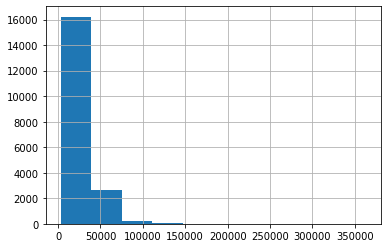

In [59]:
# Histograma de distribuição 'total_income' total
df['total_income'].hist()

# Filtrando por cluster
dfa = df[df['education'] == 'primary education']
dfb = df[df['education'] == 'secondary education']
dfc= df[df['education'] == 'some college']

# Teste Shapiro-Wilk
print(shapiro(dfa['total_income'].dropna()))
print(shapiro(dfb['total_income'].dropna()))
print(shapiro(dfc['total_income'].dropna()))

Analisando o histograma de distribuição de 'total_income' e, também, pelo teste de Shapiro-Wilke clusterizado podemos observar que a distribuição de renda é do tipo não normal, por isso iremos utilizar da mediana de cada grupo para substituição dos valores ausentes.

In [60]:
#  Escreva uma função que usaremos para preencher os valores ausentes
def preencher_income(df,valor,education):
    df['total_income'] = df.apply(lambda row: valor if pd.isna(row['total_income']) and row['education'] == education else row['total_income'], axis=1)
    return df

In [61]:
# Verifique se funciona
df2 = df.copy()
preencher_income(df2,18741.976,'primary education')
df2[df2['education']=='primary education'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 31 to 21483
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          282 non-null    int64  
 1   days_employed     261 non-null    float64
 2   dob_years         282 non-null    int64  
 3   education         282 non-null    object 
 4   education_id      282 non-null    int64  
 5   family_status     282 non-null    object 
 6   family_status_id  282 non-null    int64  
 7   gender            282 non-null    object 
 8   income_type       282 non-null    object 
 9   debt              282 non-null    int64  
 10  total_income      282 non-null    float64
 11  purpose           282 non-null    object 
 12  dob_years_cat     282 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 30.8+ KB


In [62]:
# Aplique em todas as linhas
preencher_income(df,18741.976,'primary education')
preencher_income(df,21832.241,'secondary education')
preencher_income(df,27717.907,'some college')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cat
0,1,8437.673028,42,some college,0,married,0,F,employee,0,40620.102,house,adulto
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car,adulto
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,house,adulto
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education,adulto
4,0,340266.072047,53,secondary education,1,married,1,F,retiree,0,25378.572,wedding,adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,married,1,F,business,0,35966.698,house,adulto
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,car,idoso
21522,1,2113.346888,38,secondary education,1,married,1,M,employee,1,14347.610,house,adulto
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,car,adulto


In [63]:
# Verifique se temos algum erro
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21227 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21227 non-null  int64  
 1   days_employed     19149 non-null  float64
 2   dob_years         21227 non-null  int64  
 3   education         21227 non-null  object 
 4   education_id      21227 non-null  int64  
 5   family_status     21227 non-null  object 
 6   family_status_id  21227 non-null  int64  
 7   gender            21227 non-null  object 
 8   income_type       21227 non-null  object 
 9   debt              21227 non-null  int64  
 10  total_income      21227 non-null  float64
 11  purpose           21227 non-null  object 
 12  dob_years_cat     21227 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


Pela análise não temos nenhum problema com nossos dados e os valores em 'total_income' tem o mesmo número de linhas não nulas que nossos outros dados. 

Substituimos estas por categoria e pela mediana devido ao conjunto de dado não apresentar normalidade.

###  Restaurar valores em `days_employed`


A métrica que mais faz sentido para restaurar o número de dias que trabalhou é a idade do cliente. Logicamente, quanto maior a idade maior o número de dias empregados.

Vamos aplicar uma função chamada corr(), ela realiza um cálculo de correlação das colunas da DataFrame, vamos verificar se isso é verdadeiro, de fato.

In [64]:
# Chamando a função corr() e plotando HeatMap
df.corr().style.background_gradient(cmap='coolwarm')

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
children,1.000000,-0.238375,-0.320487,-0.027085,-0.159023,0.024943,0.030350
days_employed,-0.238375,1.000000,0.609270,0.080225,0.002114,-0.048719,-0.135669
dob_years,-0.320487,0.609270,1.000000,0.064818,-0.068739,-0.071832,-0.056067
education_id,-0.027085,0.080225,0.064818,1.000000,0.009161,0.052530,-0.181427
family_status_id,-0.159023,0.002114,-0.068739,0.009161,1.000000,0.020503,-0.006412
debt,0.024943,-0.048719,-0.071832,0.052530,0.020503,1.000000,-0.013154
total_income,0.030350,-0.135669,-0.056067,-0.181427,-0.006412,-0.013154,1.000000


Nossa premissa se mostra verdadeira, já que pelo HeatMap gerado, a maior correlação com 'days_employed' é 'dob_years'.

Vamos utilizar as categorias de dob_years para clusterizar novamente e utilizar para substituição de nossos dados.

In [65]:
# Distribuição de `days_employed` médios e medianos com base em seus parâmetros identificados
# Média e mediana por categoria de idade
age_mean = df_clean.groupby('dob_years_cat').agg(days_employed_functions)
age_mean

days_employed                              
                        mean         median            std
dob_years_cat                                             
adulto          51980.066336    2357.439794  124543.897000
idoso          290587.723126  356224.257787  147681.178018
jovem            1925.799317    1046.095163   15337.264759

<AxesSubplot:>

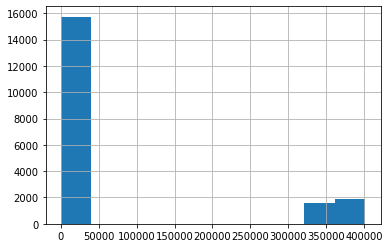

In [66]:
# Histograma de distribuição 'days_employed' total
df['days_employed'].hist()

[Decida o que você usará: médias ou medianas. Explique por quê.]

<AxesSubplot:>

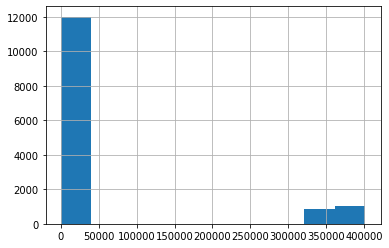

In [67]:
# novas bases para analise de histograma
dfa = df[df['dob_years_cat'] == 'adulto']
dfj = df[df['dob_years_cat'] == 'jovem']
dfi = df[df['dob_years_cat'] == 'idoso']

dfa['days_employed'].hist()

<AxesSubplot:>

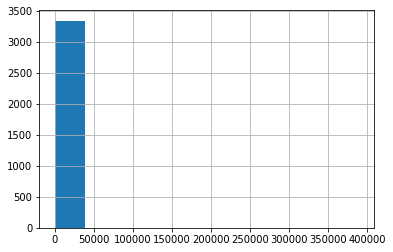

In [68]:
dfj['days_employed'].hist()

<AxesSubplot:>

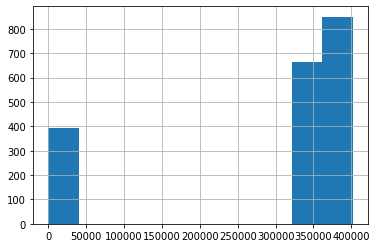

In [69]:
dfi['days_employed'].hist()

Após a análise dos histogramas podemos observar que todos eles são assimétricos, tanto positivos quanto negativos. Dessa maneira iremos utilizar a mediana novamente para substituição de valores por cluster de dob_years_cat.

In [70]:
# Vamos escrever uma função que calcule médias ou medianas (dependendo da sua decisão) com base no seu parâmetro identificado
def preencher_days(df,valor,category):
    df['days_employed'] = df.apply(lambda row: valor if pd.isna(row['days_employed']) and row['dob_years_cat'] == category else row['days_employed'], axis=1)
    return df

In [71]:
# Verifique se a função funciona
df2 = df.copy()
preencher_days(df2,1,'jovem')
df2[df2['dob_years_cat'] == 'jovem'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3698 entries, 5 to 21515
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          3698 non-null   int64  
 1   days_employed     3698 non-null   float64
 2   dob_years         3698 non-null   int64  
 3   education         3698 non-null   object 
 4   education_id      3698 non-null   int64  
 5   family_status     3698 non-null   object 
 6   family_status_id  3698 non-null   int64  
 7   gender            3698 non-null   object 
 8   income_type       3698 non-null   object 
 9   debt              3698 non-null   int64  
 10  total_income      3698 non-null   float64
 11  purpose           3698 non-null   object 
 12  dob_years_cat     3698 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 404.5+ KB


Nossa função funcionou, agora iremos aplicar a todas as categorias de dob_years_cat para substituir pela mediana.

In [72]:
# Aplicar função ao days_employed
preencher_days(df,1046.095163,'jovem')
preencher_days(df,2357.439794,'adulto')
preencher_days(df,356224.257787,'idoso')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cat
0,1,8437.673028,42,some college,0,married,0,F,employee,0,40620.102,house,adulto
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car,adulto
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,house,adulto
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education,adulto
4,0,340266.072047,53,secondary education,1,married,1,F,retiree,0,25378.572,wedding,adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,married,1,F,business,0,35966.698,house,adulto
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,car,idoso
21522,1,2113.346888,38,secondary education,1,married,1,M,employee,1,14347.610,house,adulto
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,car,adulto


In [73]:
# Verifique se a função funcionou
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21227 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21227 non-null  int64  
 1   days_employed     21227 non-null  float64
 2   dob_years         21227 non-null  int64  
 3   education         21227 non-null  object 
 4   education_id      21227 non-null  int64  
 5   family_status     21227 non-null  object 
 6   family_status_id  21227 non-null  int64  
 7   gender            21227 non-null  object 
 8   income_type       21227 non-null  object 
 9   debt              21227 non-null  int64  
 10  total_income      21227 non-null  float64
 11  purpose           21227 non-null  object 
 12  dob_years_cat     21227 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB



Verificamos todas as colunas chamando a função info() e verificamos que não existem mais nenhum valor ausente, desta maneira estamos prontos para seguir para parte de categorização de dados.

Os valores foram corrigidos e separados diante seus clusters de dados e as premissas estabelecidas durante o processo para maior acuracia possível.

Para melhor visualização, como passo final vamos transformar days_employed para int, pois não existe dias quebrados.

In [74]:
# Transformando days_employed para int()
df['days_employed'] = df['days_employed'].astype(int)

In [75]:
# Verificando
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21227 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21227 non-null  int64  
 1   days_employed     21227 non-null  int64  
 2   dob_years         21227 non-null  int64  
 3   education         21227 non-null  object 
 4   education_id      21227 non-null  int64  
 5   family_status     21227 non-null  object 
 6   family_status_id  21227 non-null  int64  
 7   gender            21227 non-null  object 
 8   income_type       21227 non-null  object 
 9   debt              21227 non-null  int64  
 10  total_income      21227 non-null  float64
 11  purpose           21227 non-null  object 
 12  dob_years_cat     21227 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.3+ MB


## Categorização de dados

Vamos lá, nesta seção iremos categorizar nossos dados para trabalhar com eles da melhor maneira possível.

Já fizemos isto na seção anterior clusterizando ou categorizando a idade do cliente entre jovem, adulto e idoso.

Agora iremos categorizar o que necessitamos para nossa análise futura, que são as colunas:

* Children
* Family status - já está categorizado, fizemos isso quando limpamos os dados
* Total Income
* Purpose - já está categorizado, fizemos isso quando limpamos os dados



Vamos verificar valores exclusivos das categorias que queremos trabalhar

In [76]:
# Verifique os valores exclusivos em children
df['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [77]:
df['family_status'].unique()

array(['married', 'widow / widower', 'divorced', 'unmarried'],
      dtype=object)

In [78]:
# Não iremos realizar a função unique para renda , pois retornaria muitos dados.

Nossas categorias serão:
* Children - Criar categoria child_cat em que mais de 1 filho retonar 'Y' e menos 'N'
* Family status - Não precisamos categorizar, com a limpeza de dados já ficou categorizado
* Total Income - Criar categorias para a renda do cliente em A/B/C levando em consideração a análise de curva ABC, onde A é acima do quartil superior, C abaixo do quartil inferior e B entre os quartis.

Vamos inciar categorizando nossos dados pelas premissas anteriores

In [79]:
# Vamos começar pela coluna children, criar uma função para categorização entre Y/N (Y = Tem filhos / N = Sem filhos)
def get_category(value):
    if value < 1:
        return 'N'
    else:
        return 'Y'


In [80]:
# Aplicar a função e criar nova coluna children_cat
df['children_cat'] = df['children'].apply(lambda x: get_category(x))
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cat,children_cat
0,1,8437,42,some college,0,married,0,F,employee,0,40620.102,house,adulto,Y
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car,adulto,Y
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,house,adulto,N
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,education,adulto,Y
4,0,340266,53,secondary education,1,married,1,F,retiree,0,25378.572,wedding,adulto,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,secondary education,1,married,1,F,business,0,35966.698,house,adulto,Y
21521,0,343937,67,secondary education,1,married,0,F,retiree,0,24959.969,car,idoso,N
21522,1,2113,38,secondary education,1,married,1,M,employee,1,14347.610,house,adulto,Y
21523,3,3112,38,secondary education,1,married,0,M,employee,1,39054.888,car,adulto,Y


In [81]:
# Para categorização do nível de renda vamos calcular os quartis Q1 e Q3 (0,25 e 0,75)
quartis = df['total_income'].quantile([0.25, 0.75])
quartis

0.25    17205.5370
0.75    31329.4655
Name: total_income, dtype: float64

Agora que sabemos os quartis superior e inferior iremos categorizar criando uma função

In [82]:
# Criando função para categorização de renda
def get_category(value):
    if value < 17205.5370:
        return 'C'
    elif value > 31329.4655:
        return 'A'
    else:
        return 'B'

In [83]:
# Aplicar a função e criar nova coluna income_cat
df['income_cat'] = df['total_income'].apply(lambda x: get_category(x))
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cat,children_cat,income_cat
0,1,8437,42,some college,0,married,0,F,employee,0,40620.102,house,adulto,Y,A
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car,adulto,Y,B
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,house,adulto,N,B
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,education,adulto,Y,A
4,0,340266,53,secondary education,1,married,1,F,retiree,0,25378.572,wedding,adulto,N,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,secondary education,1,married,1,F,business,0,35966.698,house,adulto,Y,A
21521,0,343937,67,secondary education,1,married,0,F,retiree,0,24959.969,car,idoso,N,B
21522,1,2113,38,secondary education,1,married,1,M,employee,1,14347.610,house,adulto,Y,C
21523,3,3112,38,secondary education,1,married,0,M,employee,1,39054.888,car,adulto,Y,A


In [84]:
# Verificando valores únicos em debt
print(df['debt'].unique())
print(len(df['debt']))

[0 1]
21227


Até o momento já categorizamos todos os dados que necessitamos.

Ao tirar os valores únicos de debt tiramos que o número 0 significa que nunca deixou de pagar e o valor 1 significa que já deixou de pagar algum empréstimo, ou seja um binário.

Vamos deixar assim, e realizar nossos calculos com agrupamento e soma posteriormente.

## Verificar as Hipóteses


**Existe uma correlação entre o nível de renda e do pagamento em dia?**

In [85]:
# Verifique os dados do nível de renda e do pagamento em dia
renda_group = df.groupby(by='income_cat')['debt'].sum()
print(renda_group)

# Calcular a taxa de inadimplência com base no nível de renda
inadimplencia_a = (df[df['income_cat'] == 'A']['debt'].sum())/(len(df['debt']))
inadimplencia_b = (df[df['income_cat'] == 'B']['debt'].sum())/(len(df['debt']))
inadimplencia_c = (df[df['income_cat'] == 'C']['debt'].sum())/(len(df['debt']))

# Espaçamento
print(f'\n')

# Taxa de inadimplência Grupo A
print(f'A taxa de inadimplência do grupo A é: {inadimplencia_a:.1%}')

# Espaçamento
print(f'\n')

# Taxa de inadimplência Grupo B
print(f'A taxa de inadimplência do grupo B é: {inadimplencia_b:.1%}')

# Espaçamento
print(f'\n')

# Taxa de inadimplência Grupo C
print(f'A taxa de inadimplência do grupo C é: {inadimplencia_c:.1%}')

income_cat
A    380
B    919
C    425
Name: debt, dtype: int64


A taxa de inadimplência do grupo A é: 1.8%


A taxa de inadimplência do grupo B é: 4.3%


A taxa de inadimplência do grupo C é: 2.0%


**Conclusão**

Em base as manipulações realizadas temos que a maior taxa de inadimplência é do nível de renda intermediário ao nosso conjunto de dados. Este é seguido dos de baixa renda, e logicamente por fim pelos de alta renda.

Contrariando ao que pensei no início, o público de renda baixa tem menos inadimplência que o grupo intermediário, talvez isso possa ter sido causado pelo fato de ter mais pessoas do grupo B na amostra do que do grupo C.

**Existe uma correlação entre o status familiar e o pagamento em dia?**

In [86]:
# Coletando dados únicos da coluna
df['family_status'].unique()

array(['married', 'widow / widower', 'divorced', 'unmarried'],
      dtype=object)

In [87]:
# Verifique os dados de status da família e do pagamento em dia
# Verifique os dados do nível de renda e do pagamento em dia
renda_group = df.groupby(by='family_status')['debt'].sum()
print(renda_group)

# Calcular a taxa de inadimplência com base no status familiar
inadimplencia_a = (df[df['family_status'] == 'married']['debt'].sum())/(len(df['debt']))
inadimplencia_b = (df[df['family_status'] == 'divorced']['debt'].sum())/(len(df['debt']))
inadimplencia_c = (df[df['family_status'] == 'unmarried']['debt'].sum())/(len(df['debt']))
inadimplencia_d = (df[df['family_status'] == 'widow / widower']['debt'].sum())/(len(df['debt']))

# Espaçamento
print(f'\n')

# Taxa de inadimplência Grupo Married
print(f'A taxa de inadimplência do grupo Married é: {inadimplencia_a:.1%}')

# Espaçamento
print(f'\n')

# Taxa de inadimplência Grupo Divorced
print(f'A taxa de inadimplência do grupo Divorced é: {inadimplencia_b:.1%}')

# Espaçamento
print(f'\n')

# Taxa de inadimplência Grupo Unmarried
print(f'A taxa de inadimplência do grupo Unmarried é: {inadimplencia_c:.1%}')

# Espaçamento
print(f'\n')


# Taxa de inadimplência Grupo widow / widower
print(f'A taxa de inadimplência do grupo widow / widower é: {inadimplencia_d:.1%}')

family_status
divorced             84
married            1306
unmarried           272
widow / widower      62
Name: debt, dtype: int64


A taxa de inadimplência do grupo Married é: 6.2%


A taxa de inadimplência do grupo Divorced é: 0.4%


A taxa de inadimplência do grupo Unmarried é: 1.3%


A taxa de inadimplência do grupo widow / widower é: 0.3%


**Conclusão**

Como esperado, o grupo com pessoas casadas tem a maior taxa de inadimplência de nossa amostra. Esta é seguida de pessoas divorciadas e depois do grupos dos solteiros e viúvos.

Poderíamos realizar uma análise adicional para descobrir por quais motivos os casados fazem empréstimos (provavelmente para casa ou casamento rs)

**Existe uma correlação entre o ter filhos e o pagamento em dia?**

In [88]:
# Verifique os dados de filhos e do pagamento em dia
renda_group = df.groupby(by='children_cat')['debt'].sum()
print(renda_group)

# Calcular a taxa de inadimplência com base na categoria de filhos familiar
inadimplencia_a = (df[df['children_cat'] == 'Y']['debt'].sum())/(len(df['debt']))
inadimplencia_b = (df[df['children_cat'] == 'N']['debt'].sum())/(len(df['debt']))

# Espaçamento
print(f'\n')

# Taxa de inadimplência Grupo com filhos
print(f'A taxa de inadimplência de clientes com filhos é: {inadimplencia_a:.1%}')

# Espaçamento
print(f'\n')

# Taxa de inadimplência Grupo sem filhos
print(f'A taxa de inadimplência de clientes sem filhos é: {inadimplencia_b:.1%}')

children_cat
N    1058
Y     666
Name: debt, dtype: int64


A taxa de inadimplência de clientes com filhos é: 3.1%


A taxa de inadimplência de clientes sem filhos é: 5.0%


Como uma análise adicional vamos plotar um gráfico de barras com um groupby() do número de filhos, fiquei curioso para saber como se comporta a inadimplência ao aumentar o número de filhos.

Text(0, 0.5, 'Valor')

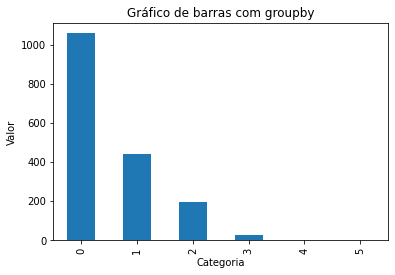

In [89]:
# agrupando os valores por categoria e somando
grouped = df.groupby(by='children')['debt'].sum()

# criando um gráfico de barras
ax = grouped.plot.bar()

# adicionando título e rótulos dos eixos
ax.set_title('Gráfico de barras com groupby')
ax.set_xlabel('Categoria')
ax.set_ylabel('Valor')

**Conclusão**

Primeiramente é possível observar que os clientes sem filhos tem maior inadimplência do que as com filhos.

O mais impressionante é que, ao contrário do que a lógica manda, os clientes quanto mais filhos tem menos inadimplentes são (não pode ser!).

**Como a finalidade do crédito afeta a taxa de inadimplência?**

In [90]:
# Coletar valores únicos na finalidade
df['purpose'].unique()

array(['house', 'car', 'education', 'wedding', 'real estate',
       'construction'], dtype=object)

In [91]:
# Confira os percentuais de inadimplência para cada finalidade de crédito e analise-os

# Verifique os dados de filhos e do pagamento em dia
renda_group = df.groupby(by='purpose')['debt'].sum()
print(renda_group)

# Calcular a taxa de inadimplência com base no status familiar
inadimplencia_a = (df[df['purpose'] == 'house']['debt'].sum())/(len(df['debt']))
inadimplencia_b = (df[df['purpose'] == 'car']['debt'].sum())/(len(df['debt']))
inadimplencia_c = (df[df['purpose'] == 'education']['debt'].sum())/(len(df['debt']))
inadimplencia_d = (df[df['purpose'] == 'wedding']['debt'].sum())/(len(df['debt']))
inadimplencia_e = (df[df['purpose'] == 'real estate']['debt'].sum())/(len(df['debt']))
inadimplencia_f = (df[df['purpose'] == 'construction']['debt'].sum())/(len(df['debt']))


# Espaçamento
print(f'\n')

# Taxa de inadimplência compra de casas
print(f'A taxa de inadimplência de clientes para casas é: {inadimplencia_a:.1%}')

# Espaçamento
print(f'\n')

# Taxa de inadimplência compra de carros
print(f'A taxa de inadimplência de clientes para carros é: {inadimplencia_b:.1%}')

# Espaçamento
print(f'\n')

# Taxa de inadimplência compra de educação
print(f'A taxa de inadimplência de clientes para educação é: {inadimplencia_c:.1%}')

# Espaçamento
print(f'\n')

# Taxa de inadimplência compra de casamento
print(f'A taxa de inadimplência de clientes para casamento é: {inadimplencia_d:.1%}')

# Espaçamento
print(f'\n')

# Taxa de inadimplência para construção
print(f'A taxa de inadimplência de clientes para real estate é: {inadimplencia_e:.1%}')

# Espaçamento
print(f'\n')

# Taxa de inadimplência para real estate
print(f'A taxa de inadimplência de clientes para construção é: {inadimplencia_f:.1%}')

purpose
car             397
construction    178
education       369
house           353
real estate     246
wedding         181
Name: debt, dtype: int64


A taxa de inadimplência de clientes para casas é: 1.7%


A taxa de inadimplência de clientes para carros é: 1.9%


A taxa de inadimplência de clientes para educação é: 1.7%


A taxa de inadimplência de clientes para casamento é: 0.9%


A taxa de inadimplência de clientes para real estate é: 1.2%


A taxa de inadimplência de clientes para construção é: 0.8%


Text(0, 0.5, 'Valor')

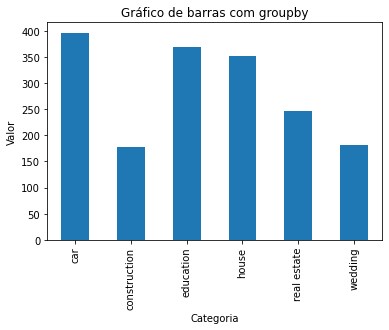

In [92]:
# A título de curiosidade vou gerar outro gráfico de barras acerca das categorias

# agrupando os valores por categoria e somando
grouped = df.groupby(by='purpose')['debt'].sum()

# criando um gráfico de barras
ax = grouped.plot.bar()

# adicionando título e rótulos dos eixos
ax.set_title('Gráfico de barras com groupby')
ax.set_xlabel('Categoria')
ax.set_ylabel('Valor')

**Conclusão**

É interessante que para os dados da finalidade nós temos que os clientes mais inadimplentes são os de compras de carros, seguidos de educação, casas, real estate, casamento e construção.

Quem diria, anteriormente achei que os casados tinham mais inadimplência porque tinham que pagar o casamento. Pelo jeito eles comprar é carros mesmo ou uma casa, vai saber, precisariamos realizar outra análise. Mas não é o objetivo, no momento.

# Conclusão Geral 

Primeiramente acerca das relações testadas temos que:

    Testamos o seguinte:

    * 		Existe alguma relação entre ter filhos e pagar um empréstimo em dia?
    * 		Existe alguma relação entre o estado civil e o pagamento de um empréstimo no prazo estipulado?
    * 		Existe uma relação entre o nível de renda e o pagamento de um empréstimo no prazo?
    * 		Como as diferentes finalidades do empréstimo afetam o pagamento pontual do empréstimo?
    
Depois de analisar os dados, nós concluímos:

* Existe sim uma relação entre filhos e empréstimo ao dia, sendo que quanto maior o número de filhos menor a inadimplência. O grupo com maior indamplência são os sem filhos.

* O estado civil afeta sim o pagamento de empréstimos, Casados tem maior inadimplência seguido de Solteiros e depois as outras categorias de Viúvo e Divorciado. É interessante notar que os casados tem quase 5x mais possibilidade de inadimplência do que solteiros.

* O nível de renda não afetou o pagamento do empréstimo de maneira significativa, separamos os níveis de renda conforme os quartis de renda e pudemos observar que a diferença da taxa de inadimplência do grupo do quartil superior e inferior é baixa. O grupo intermediário teve maior número de inadimplentes, assim não temos como afirmar que é fator determinante.

* A finalidade afeta o pagamento dos empréstimos sendo que empréstimos para carros, casas e educação tem maiores taxas de inadimplentes, a parte de real estate intermediária e casamentos e construção os mais baixos. Se agregarmos o grupo real estate a casas, ou seja ao ramo imobiliário, teremos que é o grupo com maior taxa de inadimplência disparado.


Acerca do processamento de dados:

É possível observar que a parte mais árdua do processo de análise de dados é o pré-processamento e processamento de dados, neste caso o mais importante foi a substituição dos valores ausentes, concluímos que os valores ausentes não eram aleatório e talvez eram devido a erros de digitação ou não inserção dos dados na DB.

Tivemos ocasiões de duplicatas implícitas nas colunas, isso deve ser devido a inserção de nomes livres e não categorizados pelo operador de entrada. Lidamos com elas analisando e categorizando.

Além disso, categorizamos dados para melhor análise clusterizando a DataFrame para os valores que necessitávamos trabalhar.

Para lidar com os valores ausentes utilizamos de análise de distribuição de dados e substituimos os valores utilizando a mediana para substituição, pois percebemos que nossos dados eram não normais. Combinamos isso com a clusterização para maior precisão na substituição dos valores ausentes.